# "How to make Pareto chart in Matplotlib"

Code for the following Medium article: [update](https://medium.com/@pawjast)

**References:**

1. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html

2. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html

3. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html

4. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html

5. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data - dataframe
The data represents the number of items sold in a "Fruit vending machine" in one week.

In [2]:
# mock data
df = pd.DataFrame.from_dict(
    {
        "Banana": 10,
        "Grapes": 8,
        "Pear": 3,
        "Orange": 5,
        "Cherries": 1,
        "Apple": 20,
        "Strawberries": 2,
        "Plum": 1
    },
    orient="index",
    columns=["items_sold"]
)

df

,items_sold
Banana,10
Grapes,8
Pear,3
Orange,5
Cherries,1
Apple,20
Strawberries,2
Plum,1


## Sort the data 

In [3]:
df.sort_values(
    by="items_sold",
    ascending=False,
    inplace=True
)

df

,items_sold
Apple,20
Banana,10
Grapes,8
Orange,5
Pear,3
Strawberries,2
Cherries,1
Plum,1


## Plot data

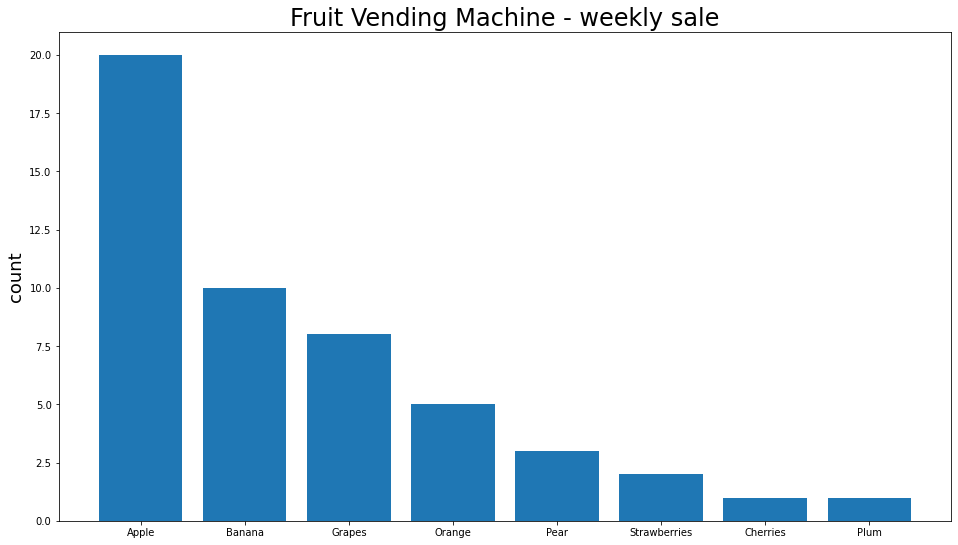

In [4]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(
    x=df.index,
    height=df["items_sold"]
)

# axis settings
ax.set_title(
    "Fruit Vending Machine - weekly sale",
    fontsize=24
)
ax.set_ylabel(
    "count",
    fontsize=18
);

## Calculations for Pareto chart
* cs: cummulative sum
* rcs: realtive cummulative sume

In [5]:
df["cs"] = df["items_sold"].cumsum()
df["rcs"] = df["cs"] / df["items_sold"].sum()

df

,items_sold,cs,rcs
Apple,20,20,0.40
Banana,10,30,0.60
Grapes,8,38,0.76
Orange,5,43,0.86
Pear,3,46,0.92
Strawberries,2,48,0.96
Cherries,1,49,0.98
Plum,1,50,1.00


## Plot Pareto chart

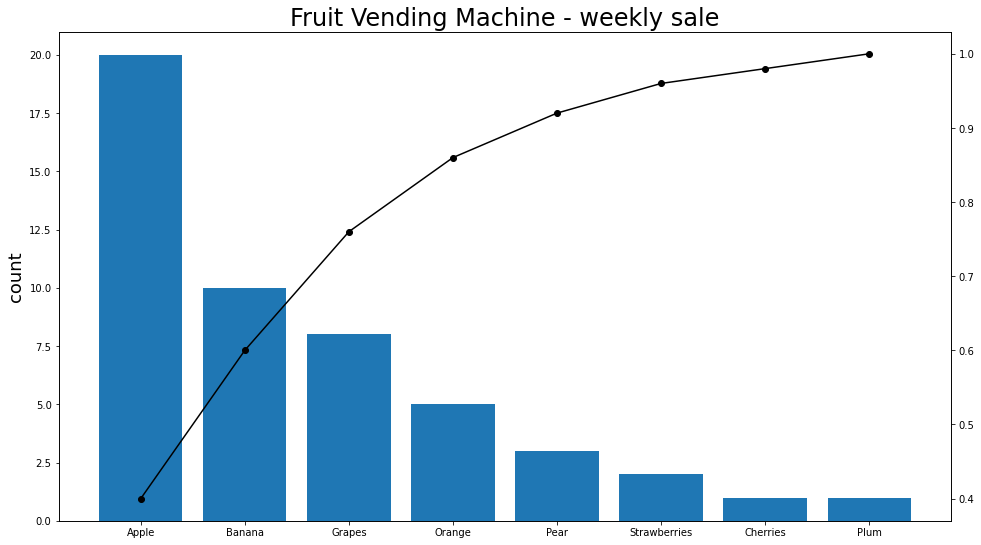

In [6]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(
    x=df.index,
    height=df["items_sold"]
)

# add second Y-axis
ax2 = ax.twinx()
ax2.plot(
    df["rcs"],
    marker="o",
    color="black"
)

# axis settings
ax.set_title(
    "Fruit Vending Machine - weekly sale",
    fontsize=24
)
ax.set_ylabel(
    "count",
    fontsize=18
);

## Plot Pareto chart with labels for relative cumulative sum

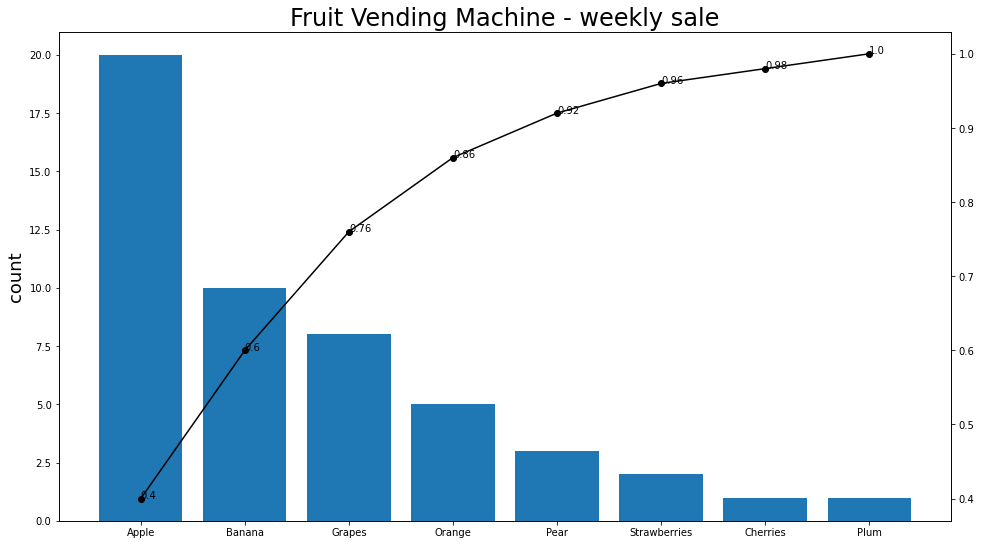

In [7]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(
    x=df.index,
    height=df["items_sold"]
)

# add second Y-axis
ax2 = ax.twinx()
ax2.plot(
    df["rcs"],
    marker="o",
    color="black"
)

# axis settings
ax.set_title(
    "Fruit Vending Machine - weekly sale",
    fontsize=24
)
ax.set_ylabel(
    "count",
    fontsize=18
);


# labels
for x_val, y_val in zip (range(len(df)), df["rcs"]):
    # place the text labels on the graph
    ax2.text(
        x=x_val,
        y=y_val,
        s=y_val, 
    )

## Re-plot Pareto with tweaked labels 1
* tweaked size
* tweaked position

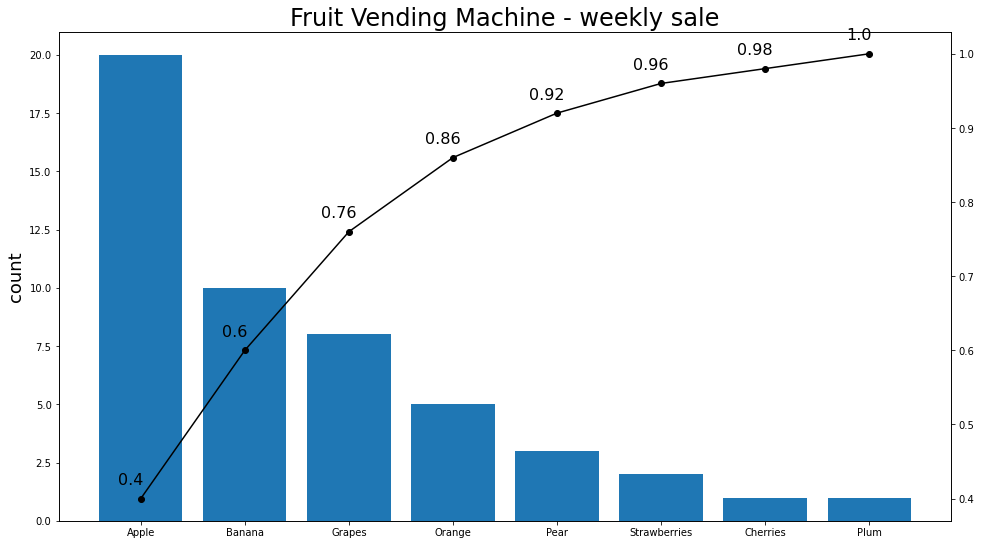

In [8]:
# plot
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(
    x=df.index,
    height=df["items_sold"]
)

# add second Y-axis
ax2 = ax.twinx()
ax2.plot(
    df["rcs"],
    marker="o",
    color="black"
)

# axis settings
ax.set_title(
    "Fruit Vending Machine - weekly sale",
    fontsize=24
)
ax.set_ylabel(
    "count",
    fontsize=18
);


# labels
for x_val, y_val in zip (range(len(df)), df["rcs"]):
    # place the text labels on the graph
    ax2.text(
        x=x_val - 0.10,
        y=y_val + 0.025,
        s=y_val, 
        fontsize=16,
        color="black",
        ha="center",
        va="center"
    )

## Recap on string formatting

More info in [this](https://medium.com/geekculture/python-f-string-codes-i-use-every-day-e03558f12057) article.

In [9]:
a = 0.7

print(f"line 1: {a}")  # print as is
print(f"line 2: {a:f}")  # print as a float
print(f"line 3: {a:.2f}")  # control number of decimal places
print(f"line 4: {a:.0%}")  # print as a % and control nr of decimal places

line 1: 0.7
line 2: 0.700000
line 3: 0.70
line 4: 70%


## Re-plot Pareto with tweaked labels 2

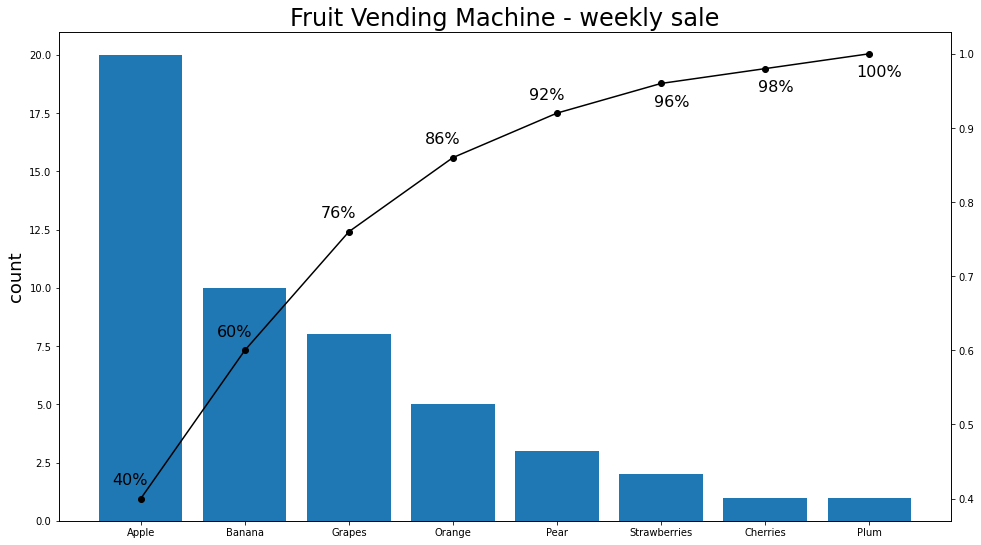

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(
    x=df.index,
    height=df["items_sold"]
)

# add second Y-axis
ax2 = ax.twinx()
ax2.plot(
    df["rcs"],
    marker="o",
    color="black"
)

# axis settings
ax.set_title(
    "Fruit Vending Machine - weekly sale",
    fontsize=24
)
ax.set_ylabel(
    "count",
    fontsize=18
);


# labels
for x_val, y_val in zip (range(len(df)), df["rcs"]):
    # set the format of the text to %
    text = f"{y_val:.0%}"
    
    # place the text labels on the graph
    if y_val > .95:
        ax2.text(
            x=x_val + 0.10,
            y=y_val - 0.025,
            s=text, 
            fontsize=16,
            color="black",
            ha="center",
            va="center"
        )
    else:
        ax2.text(
            x=x_val - 0.10,
            y=y_val + 0.025,
            s=text, 
            fontsize=16,
            color="black",
            ha="center",
            va="center"
        )

## Clean the code
* extract the common `ax2.text()` parameters to the dictionary

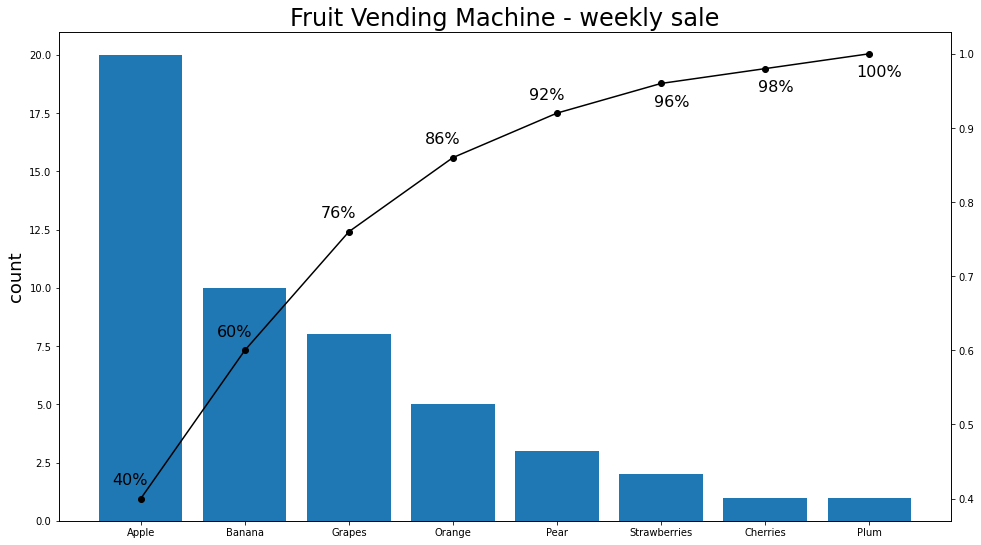

In [11]:
# plot
fig, ax = plt.subplots(figsize=(16, 9))
ax.bar(
    x=df.index,
    height=df["items_sold"]
)

# add second Y-axis
ax2 = ax.twinx()
ax2.plot(
    df["rcs"],
    marker="o",
    color="black"
)

# axis settings
ax.set_title(
    "Fruit Vending Machine - weekly sale",
    fontsize=24
)
ax.set_ylabel(
    "count",
    fontsize=18
);


# common parameters for the labels
text_params = {
    "fontsize": 16,
    "color": "black",
    "ha": "center",
    "va": "center"
}

# labels
for x_val, y_val in zip (range(len(df)), df["rcs"]):
    # set the format of the text to %
    text = f"{y_val:.0%}"
    
    # place the text labels on the graph
    if y_val > .95:
        ax2.text(
            x=x_val + 0.10,
            y=y_val - 0.025,
            s=text, 
            **text_params
        )
    else:
        ax2.text(
            x=x_val - 0.10,
            y=y_val + 0.025,
            s=text,
            **text_params
        )

## Re-plot Pareto with final tweaks

* update bar colours
* update width of the bars
* update axis scales
* update tick label size

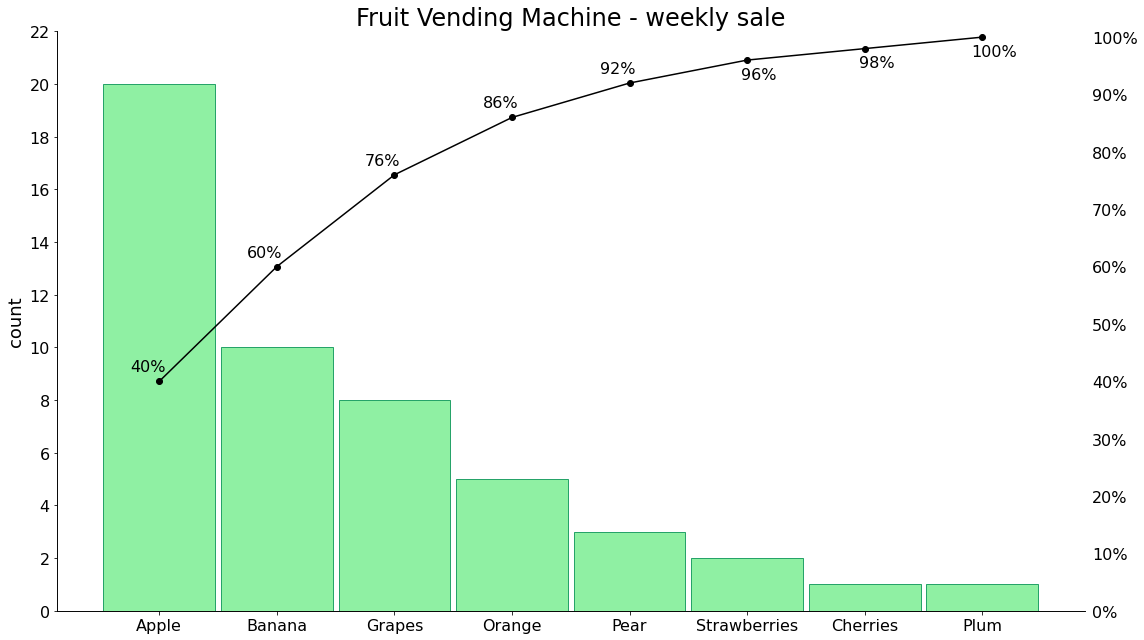

In [12]:
# plot
fig, ax = plt.subplots(
    figsize=(16, 9)
)
ax.bar(
    x=df.index,
    height=df["items_sold"],
    width=0.95,
    color=[0.56, 0.94, 0.64],  # RGB [143, 240, 164]
    edgecolor=[0.15, 0.64, 0.41]  # RGB [38, 162, 105]
)

# add second Y-axis
ax2 = ax.twinx()

ax2.plot(
    df["rcs"],
    marker="o",
    color="black"
)

# axis settings
ax.set_title(
    "Fruit Vending Machine - weekly sale",
    fontsize=24
)
ax.set_ylabel(
    "count",
    fontsize=18
);


# common parameters for the labels
text_params = {
    "fontsize": 16,
    "color": "black",
    "ha": "center",
    "va": "center"
}

# labels
for x_val, y_val in zip (range(len(df)), df["rcs"]):
    # set the format of the text to %
    text = f"{y_val:.0%}"
    
    # place the text labels on the graph
    if y_val > .95:
        ax2.text(
            x=x_val + 0.10,
            y=y_val - 0.025,
            s=text, 
            **text_params
        )
    else:
        ax2.text(
            x=x_val - 0.10,
            y=y_val + 0.025,
            s=text,
            **text_params
        )

ax.set_ylim(0, 22)
ax.set_yticks(range(0, 24, 2))

ax2.set_ylim(0, 1.01)
ax2.set_yticks(np.arange(0, 1.05, 0.1))
ax2.set_yticklabels([f"{y_val:.0%}" for y_val in np.arange(0, 1.05, 0.1)])

for a in [ax, ax2]:
    a.tick_params(
        axis="both",
        which="major",
        labelsize=16
    )

    # Hide spines
    a.spines.right.set_visible(False)
    a.spines.top.set_visible(False)

# Hide ticks
ax2.tick_params(right=False)

plt.tight_layout()
plt.savefig(
    fname="pareto_final.png",
    dpi=125,
    facecolor=[1, 1, 1],
);